In [87]:
import os
import gdown
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


file_url = 'https://drive.google.com/uc?id=1nzrtQpfaHL0OgJ_eXzA7VuEj7XotrSWO'
output_file = 'dataset.zip'
gdown.download(file_url, output_file, quiet=False)

import zipfile
with zipfile.ZipFile(output_file, 'r') as zip_ref:
    zip_ref.extractall('data')

Downloading...
From: https://drive.google.com/uc?id=1nzrtQpfaHL0OgJ_eXzA7VuEj7XotrSWO
To: /content/dataset.zip
100%|██████████| 4.21M/4.21M [00:00<00:00, 163MB/s]


In [88]:
def process_data(folder):
    data = []
    for file in os.listdir(os.path.join('data', folder)):
        if file.endswith(".csv"):
            df = pd.read_csv(os.path.join('data', folder, file))
            data.append(df)
    return pd.concat(data, ignore_index=True)

idle_df = process_data('idle')
running_df = process_data('running')
stairs_df = process_data('stairs')
walking_df = process_data('walking')


In [89]:
idle_df.head(5)

,accelerometer_X,accelerometer_Y,accelerometer_Z
0,-0.311246,4.563349,8.595184
1,-0.110133,4.807557,8.968679
2,-0.306458,4.534618,8.590396
3,-0.277727,5.966351,11.089942
4,-1.441309,7.469909,7.417237


In [90]:
window_size = 10

def calculate_time_features(data, window_size):
    time_features = []
    num_windows = len(data) // window_size

    for i in range(num_windows):
        window_data = data[i*window_size:(i+1)*window_size]
        features = []

        for axis in ['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z']:
            features.extend([
                np.mean(window_data[axis]),
                np.std(window_data[axis]),
                np.median(window_data[axis]),
                np.min(window_data[axis]),
                np.max(window_data[axis]),
                np.percentile(window_data[axis], 25),
                np.percentile(window_data[axis], 75)
            ])

        time_features.append(features)

    return time_features


idle_time_features = calculate_time_features(idle_df, window_size)
running_time_features = calculate_time_features(running_df, window_size)
stairs_time_features = calculate_time_features(stairs_df, window_size)
walking_time_features = calculate_time_features(walking_df, window_size)

In [91]:
X_time = (
    idle_time_features + running_time_features +
    stairs_time_features + walking_time_features
)
y_time = ['idle']*len(idle_time_features) + ['running']*len(running_time_features) + ['stairs']*len(stairs_time_features) + ['walking']*len(walking_time_features)

X_train_time, X_test_time, y_train_time, y_test_time = train_test_split(
    X_time, y_time, test_size=0.2, random_state=42
)

# SVM та RandomForest
svm_classifier_time = SVC()
svm_classifier_time.fit(X_train_time, y_train_time)
svm_predictions_time = svm_classifier_time.predict(X_test_time)

rf_classifier_time = RandomForestClassifier()
rf_classifier_time.fit(X_train_time, y_train_time)
rf_predictions_time = rf_classifier_time.predict(X_test_time)

# classification report
print("SVM Classification Report (with time features):")
print(classification_report(y_test_time, svm_predictions_time))

print("Random Forest Classification Report (with time features):")
print(classification_report(y_test_time, rf_predictions_time))

SVM Classification Report (with time features):
              precision    recall  f1-score   support

        idle       1.00      1.00      1.00       612
     running       1.00      1.00      1.00      2066
      stairs       0.92      0.24      0.39        94
     walking       0.94      1.00      0.97      1106

    accuracy                           0.98      3878
   macro avg       0.96      0.81      0.84      3878
weighted avg       0.98      0.98      0.98      3878

Random Forest Classification Report (with time features):
              precision    recall  f1-score   support

        idle       1.00      1.00      1.00       612
     running       1.00      1.00      1.00      2066
      stairs       1.00      0.95      0.97        94
     walking       1.00      1.00      1.00      1106

    accuracy                           1.00      3878
   macro avg       1.00      0.99      0.99      3878
weighted avg       1.00      1.00      1.00      3878



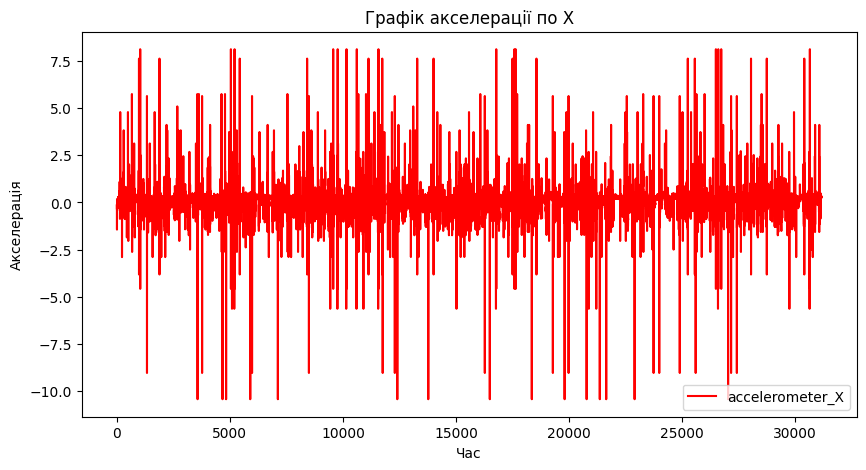

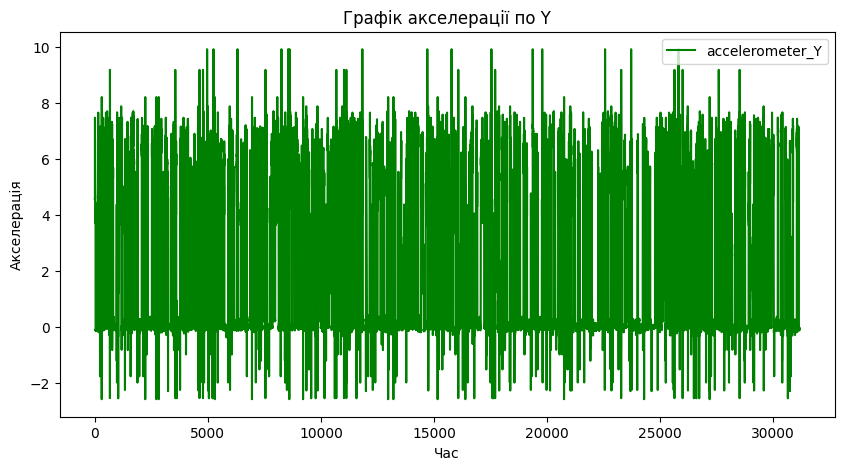

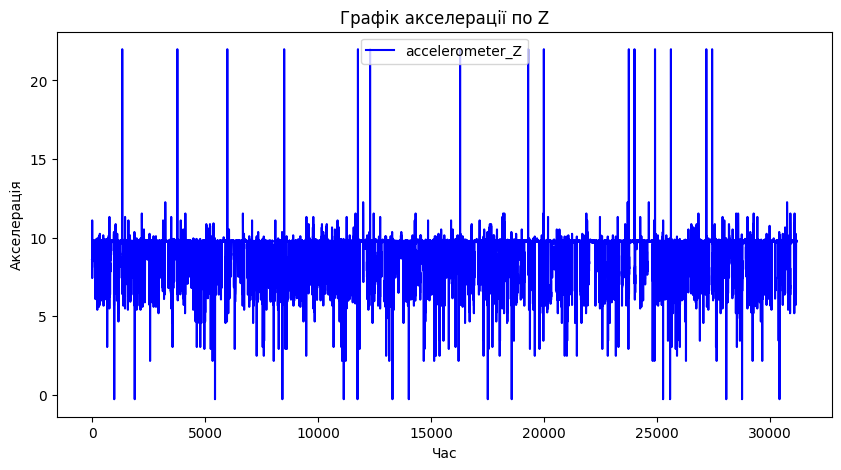

In [92]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X = idle_df.index
Y = idle_df['accelerometer_X']
Z = idle_df['accelerometer_Y']
W = idle_df['accelerometer_Z']

# Акселерація по X
plt.figure(figsize=(10, 5))
plt.plot(X, Y, color='red', label='accelerometer_X')
plt.xlabel('Час')
plt.ylabel('Акселерація')
plt.title('Графік акселерації по X')
plt.legend()
plt.show()

# Акселерація по Y
plt.figure(figsize=(10, 5))
plt.plot(X, Z, color='green', label='accelerometer_Y')
plt.xlabel('Час')
plt.ylabel('Акселерація')
plt.title('Графік акселерації по Y')
plt.legend()
plt.show()

# Акселерація по Z
plt.figure(figsize=(10, 5))
plt.plot(X, W, color='blue', label='accelerometer_Z')
plt.xlabel('Час')
plt.ylabel('Акселерація')
plt.title('Графік акселерації по Z')
plt.legend()
plt.show()

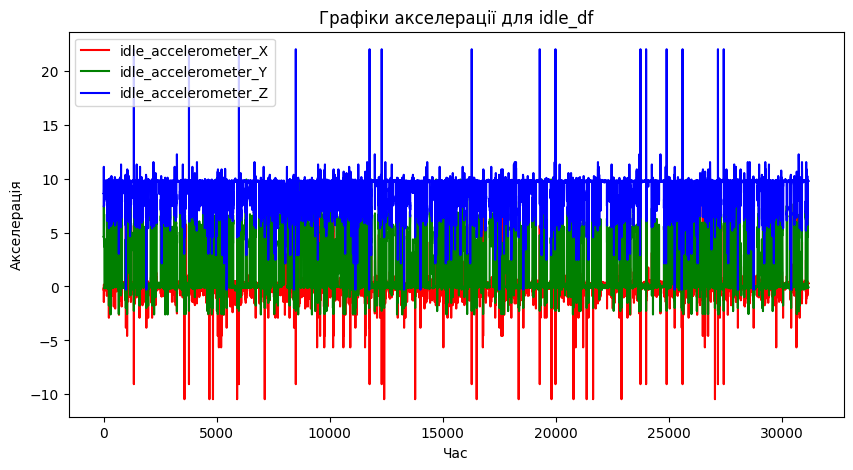

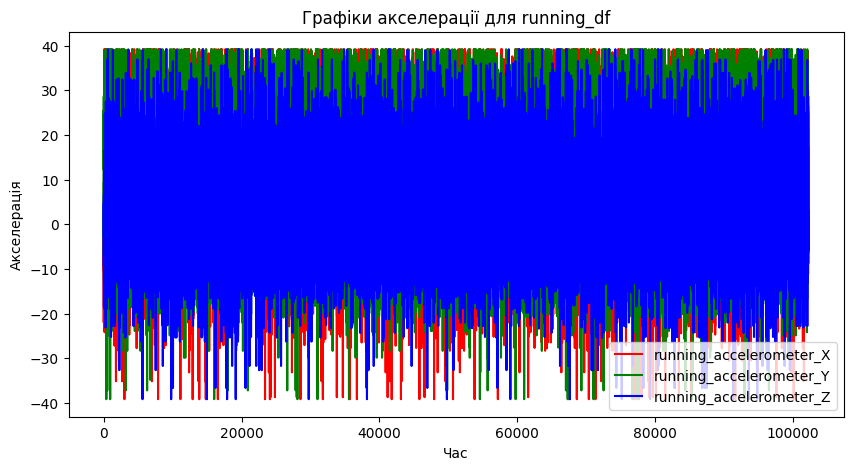

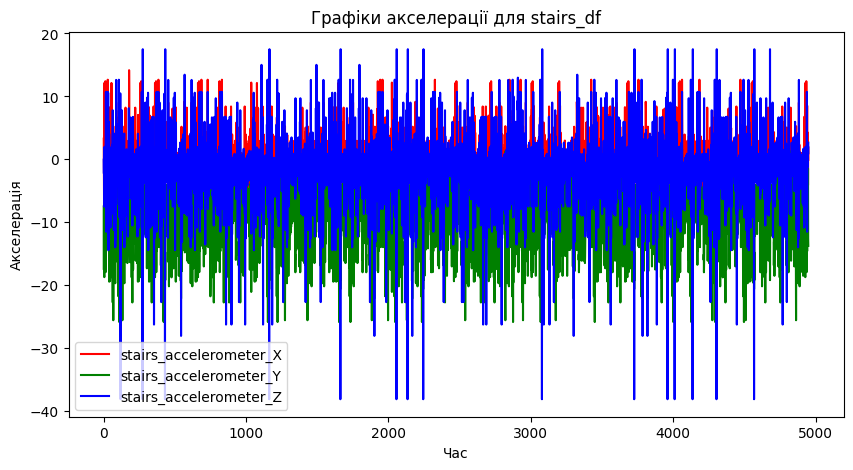

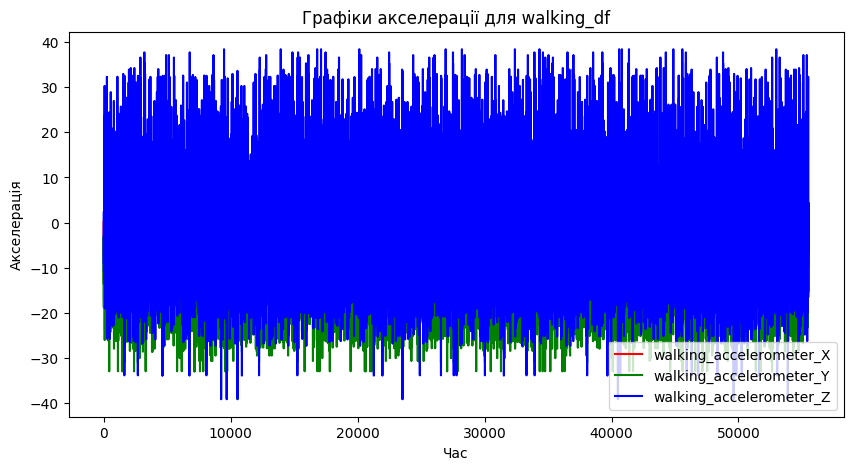

In [93]:
# idle_df
plt.figure(figsize=(10, 5))
plt.plot(idle_df.index, idle_df['accelerometer_X'], label='idle_accelerometer_X', color='red')
plt.plot(idle_df.index, idle_df['accelerometer_Y'], label='idle_accelerometer_Y', color='green')
plt.plot(idle_df.index, idle_df['accelerometer_Z'], label='idle_accelerometer_Z', color='blue')
plt.title('Графіки акселерації для idle_df')
plt.xlabel('Час')
plt.ylabel('Акселерація')
plt.legend()
plt.show()

# running_df
plt.figure(figsize=(10, 5))
plt.plot(running_df.index, running_df['accelerometer_X'], label='running_accelerometer_X', color='red')
plt.plot(running_df.index, running_df['accelerometer_Y'], label='running_accelerometer_Y', color='green')
plt.plot(running_df.index, running_df['accelerometer_Z'], label='running_accelerometer_Z', color='blue')
plt.title('Графіки акселерації для running_df')
plt.xlabel('Час')
plt.ylabel('Акселерація')
plt.legend()
plt.show()

# stairs_df
plt.figure(figsize=(10, 5))
plt.plot(stairs_df.index, stairs_df['accelerometer_X'], label='stairs_accelerometer_X', color='red')
plt.plot(stairs_df.index, stairs_df['accelerometer_Y'], label='stairs_accelerometer_Y', color='green')
plt.plot(stairs_df.index, stairs_df['accelerometer_Z'], label='stairs_accelerometer_Z', color='blue')
plt.title('Графіки акселерації для stairs_df')
plt.xlabel('Час')
plt.ylabel('Акселерація')
plt.legend()
plt.show()

# walking_df
plt.figure(figsize=(10, 5))
plt.plot(walking_df.index, walking_df['accelerometer_X'], label='walking_accelerometer_X', color='red')
plt.plot(walking_df.index, walking_df['accelerometer_Y'], label='walking_accelerometer_Y', color='green')
plt.plot(walking_df.index, walking_df['accelerometer_Z'], label='walking_accelerometer_Z', color='blue')
plt.title('Графіки акселерації для walking_df')
plt.xlabel('Час')
plt.ylabel('Акселерація')
plt.legend()
plt.show()

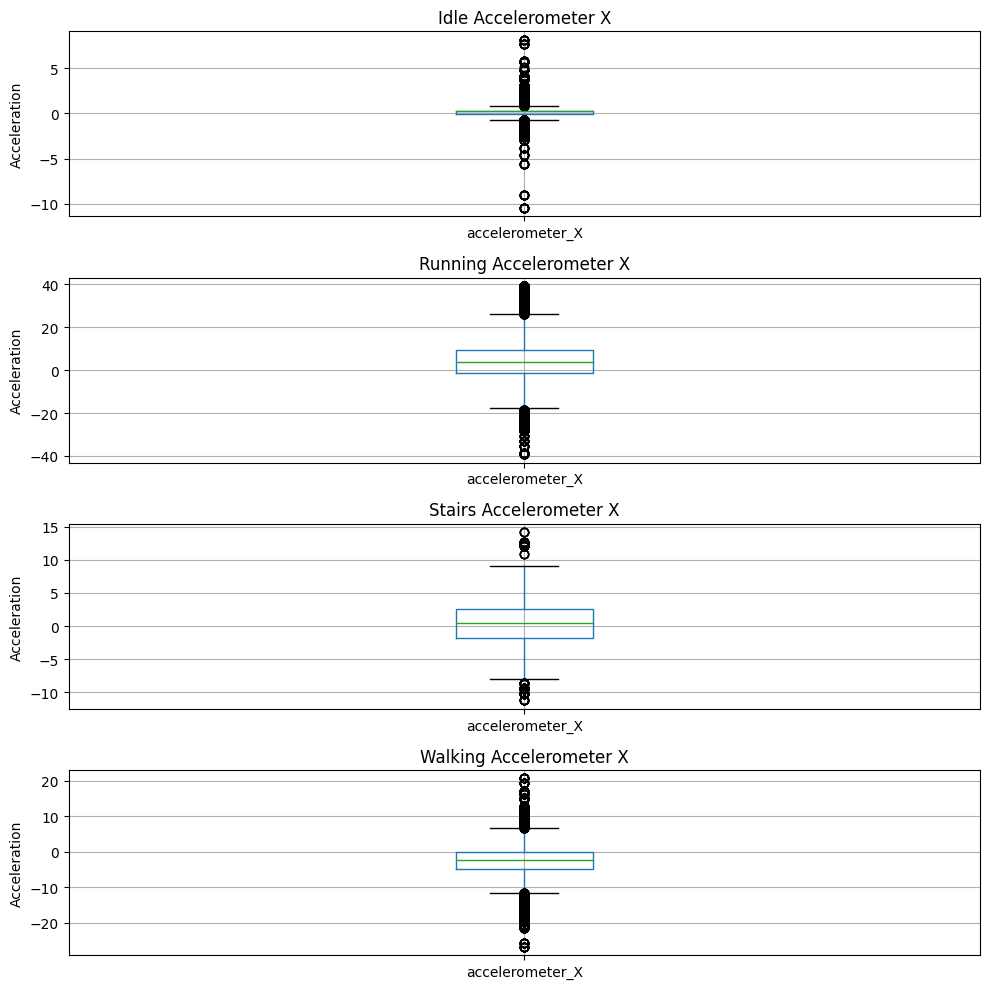

In [94]:
fig, axs = plt.subplots(4, 1, figsize=(10, 10))

idle_df.boxplot(column=['accelerometer_X'], ax=axs[0])
axs[0].set_title('Idle Accelerometer X')
axs[0].set_ylabel('Acceleration')

running_df.boxplot(column=['accelerometer_X'], ax=axs[1])
axs[1].set_title('Running Accelerometer X')
axs[1].set_ylabel('Acceleration')

stairs_df.boxplot(column=['accelerometer_X'], ax=axs[2])
axs[2].set_title('Stairs Accelerometer X')
axs[2].set_ylabel('Acceleration')

walking_df.boxplot(column=['accelerometer_X'], ax=axs[3])
axs[3].set_title('Walking Accelerometer X')
axs[3].set_ylabel('Acceleration')

plt.tight_layout()
plt.show()

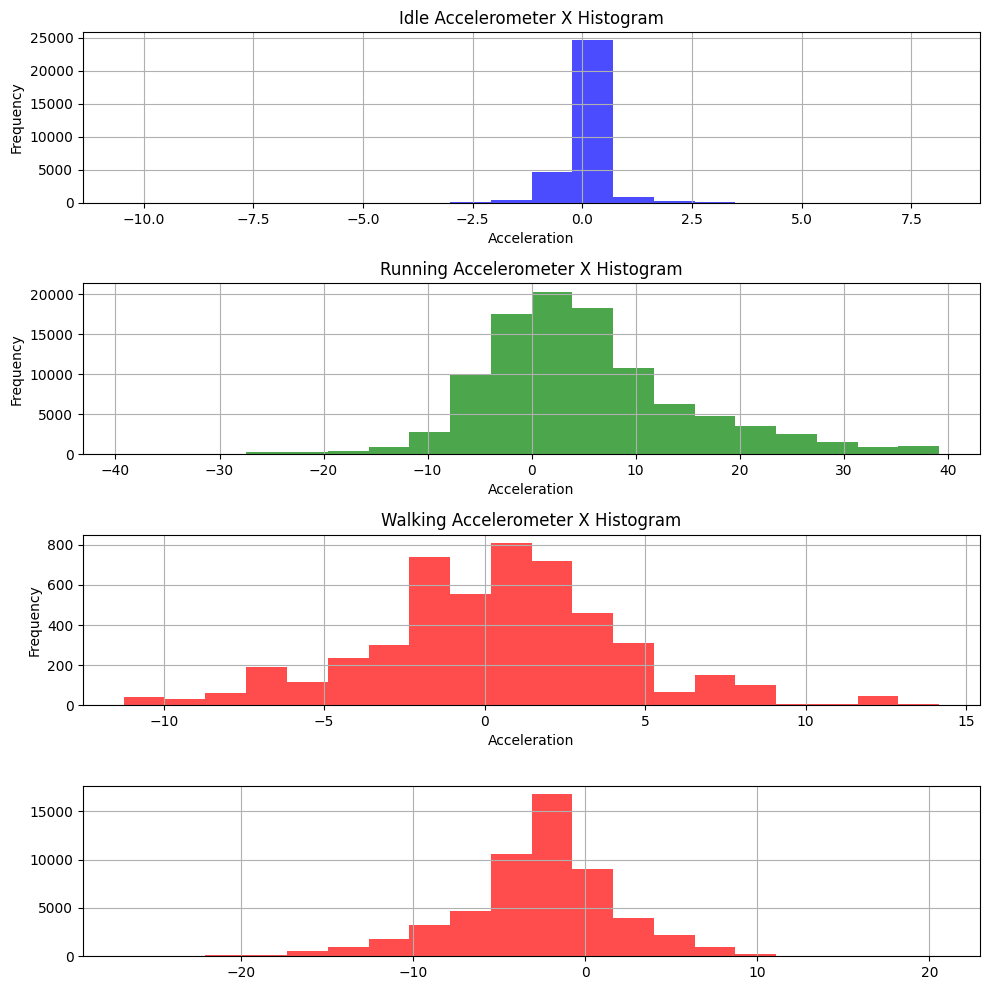

In [95]:
fig, axs = plt.subplots(4, 1, figsize=(10, 10))

idle_df['accelerometer_X'].hist(ax=axs[0], bins=20, color='blue', alpha=0.7)
axs[0].set_title('Idle Accelerometer X Histogram')
axs[0].set_xlabel('Acceleration')
axs[0].set_ylabel('Frequency')

running_df['accelerometer_X'].hist(ax=axs[1], bins=20, color='green', alpha=0.7)
axs[1].set_title('Running Accelerometer X Histogram')
axs[1].set_xlabel('Acceleration')
axs[1].set_ylabel('Frequency')

stairs_df['accelerometer_X'].hist(ax=axs[2], bins=20, color='red', alpha=0.7)
axs[2].set_title('Stairs Accelerometer X Histogram')
axs[2].set_xlabel('Acceleration')
axs[2].set_ylabel('Frequency')

walking_df['accelerometer_X'].hist(ax=axs[3], bins=20, color='red', alpha=0.7)
axs[2].set_title('Walking Accelerometer X Histogram')
axs[2].set_xlabel('Acceleration')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()